In [10]:
import torch as t
import torchvision as tv
from torchvision import transforms, datasets

import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST("", train=True, download=True, 
                       transform= transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, 
                       transform= transforms.Compose([transforms.ToTensor()]))

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


C:\Users\Daniel\Miniconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
trainset = t.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = t.utils.data.DataLoader(test, batch_size=10, shuffle=True)
# batch size allows us to feed 10 samples at a time to our model
# helps with very large datasets
# passing batches at a time can help in better generalizing of the data
# shuffling helps randomize the data

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [17]:
x, y = data[0][0], data[1][0]
print(y)
print(x.shape)

tensor(9)
torch.Size([1, 28, 28])


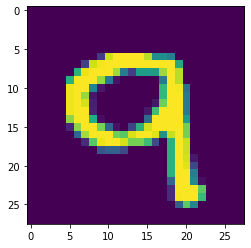

In [16]:
# we have to view=reshape to avoid the 1 in the tensor shape
plt.imshow(x.view([28,28]))
plt.show()

In [29]:
from collections import Counter, defaultdict

In [48]:
main_cnt = Counter()
for data in trainset:
    y = data[1]
    y = [int(i) for i in y]
    main_cnt = main_cnt + Counter(y)

In [49]:
total = sum(main_cnt.values())
main_cnt = {k:((v/total)*100) for k,v in main_cnt.items()}

In [52]:
main_cnt

{3: 10.218333333333334,
 9: 9.915000000000001,
 0: 9.871666666666666,
 4: 9.736666666666666,
 5: 9.035,
 1: 11.236666666666666,
 6: 9.863333333333333,
 7: 10.441666666666666,
 2: 9.93,
 8: 9.751666666666667}